In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3-1AI/titanic.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [12]:
# 컬렴명 확인
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Survived')

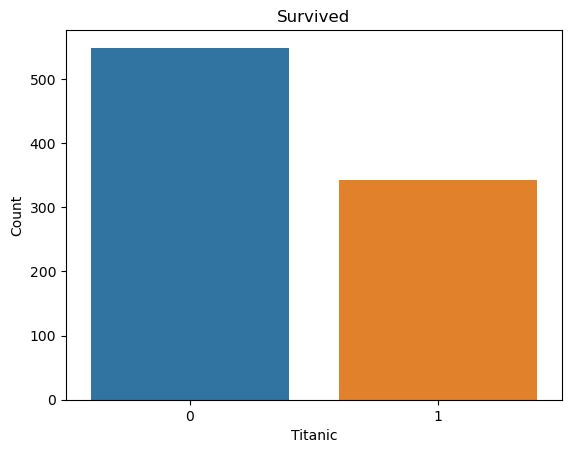

In [13]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Titanic")
plt.ylabel("Count")
plt.title("Survived")

In [14]:
# 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
# 결측치 확인
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [17]:
# 변경된 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

Text(0.5, 1.0, 'Survived')

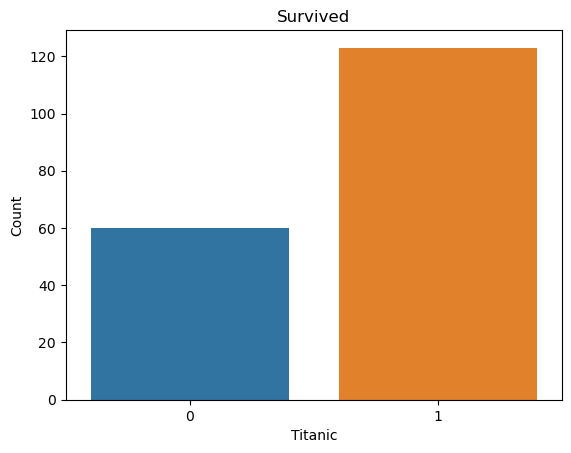

In [18]:
# 변경된 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Titanic")
plt.ylabel("Count")
plt.title("Survived")

In [19]:
# 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

In [20]:
# 결측치 확인
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [21]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [22]:
# 변경된 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

Text(0.5, 1.0, 'Survived')

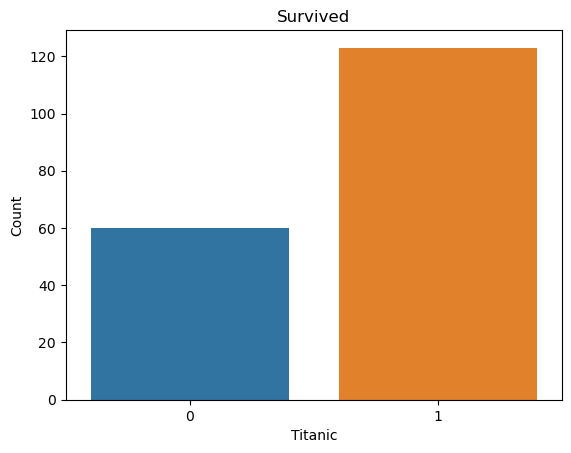

In [23]:
# 변경된 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Titanic")
plt.ylabel("Count")
plt.title("Survived")

In [24]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
# 새로운 형태로 데이터프레임 정의 -> 결측치가 많은 cabin 열 삭제
df = df[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]

In [28]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C


In [29]:
# 'Age' 컬럼의 평균 계산
age_mean = df['Age'].mean()
print("Age 컬럼의 평균:", age_mean)

Age 컬럼의 평균: 35.6744262295082


In [30]:
# 결측치를 평균 값으로 대체
df['Age'].fillna(age_mean, inplace=True)

/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_57477/66774725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(age_mean, inplace=True)


In [31]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C


In [32]:
# 결측치 확인
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Text(0.5, 1.0, 'Survived')

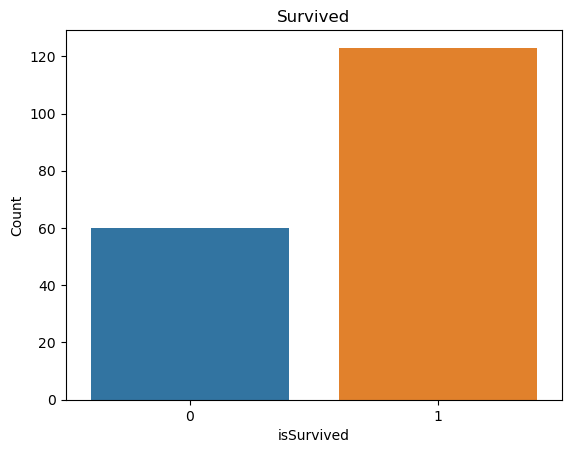

In [33]:
# 변경된 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("isSurvived")
plt.ylabel("Count")
plt.title("Survived")

AgeGroup
(0, 10]      8
(10, 20]    15
(20, 30]    30
(30, 40]    37
(40, 50]    17
(50, 60]    14
(60, 70]     1
(70, 80]     1
Name: Survived, dtype: int64
전체 생존한 사람 수: 123


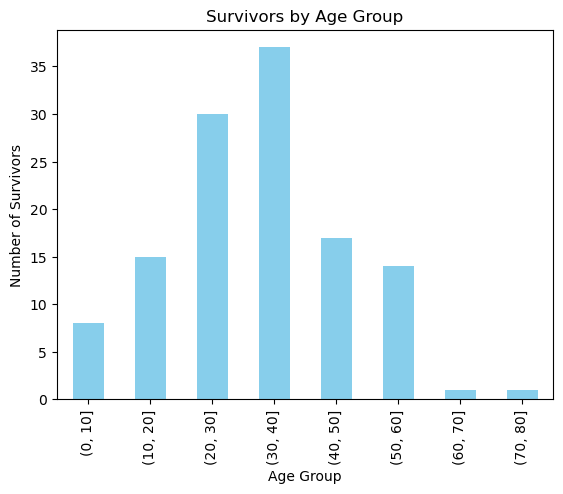

In [34]:
# 나이대 구간 설정
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# 나이대별로 데이터 그룹화
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)

# 나이대를 기준으로 데이터프레임 그룹화 및 생존자 수 합산
survived_by_age = df.groupby('AgeGroup', observed=True)['Survived'].sum()
print(survived_by_age)

total_survived = survived_by_age.sum()
print("전체 생존한 사람 수:", total_survived)

# 시각화
survived_by_age.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')

# 그래프 표시
plt.show()

AgeGroup
(0, 10]      2
(10, 20]     4
(20, 30]    10
(30, 40]    12
(40, 50]    16
(50, 60]     8
(60, 70]     7
(70, 80]     1
Name: Survived, dtype: int64
전체 생존하지 못한 사람 수: 60


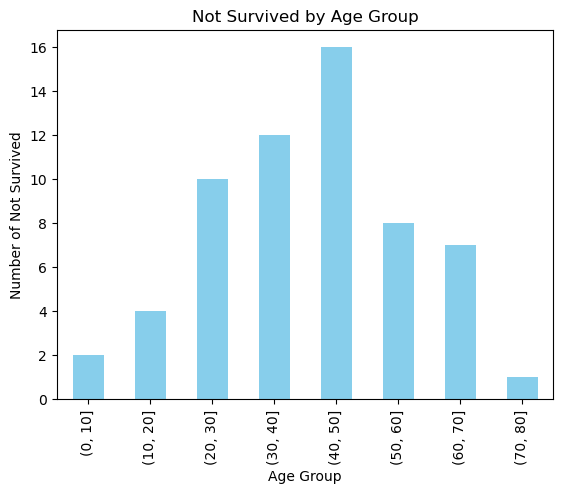

In [35]:
# 생존하지 못한 사람 필터링
not_survived_df = df[df['Survived'] == 0]

# 나이대를 기준으로 데이터프레임 그룹화 및 생존하지 못한 사람 수 합산
not_survived_by_age = not_survived_df.groupby('AgeGroup', observed=True)['Survived'].count()
print(not_survived_by_age)

# 생존하지 못한 사람의 나이대별 수 모두 더하기
total_not_survived = not_survived_by_age.sum()
print("전체 생존하지 못한 사람 수:", total_not_survived)

# 시각화
not_survived_by_age.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('Not Survived by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Not Survived')

# 그래프 표시
plt.show()

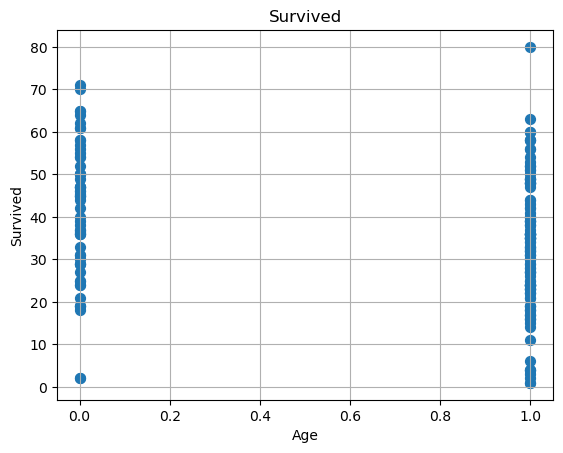

In [36]:
df.plot.scatter(x='Survived', y='Age', marker='o', s=50)

# 그래프 제목과 축 라벨 추가
plt.title('Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.grid('true')

# 그래프 표시
plt.show()

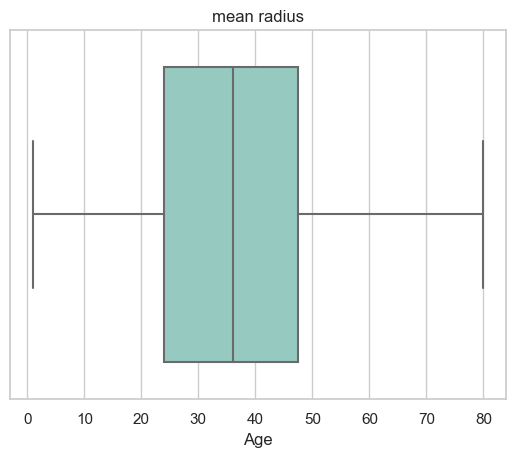

In [37]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("mean radius")
plt.show()